In [1]:
import splat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from astropy.visualization import ZScaleInterval
import matplotlib
import wisps
import wisps.simulations as wispsim
import seaborn as sns
import matplotlib.colors as mcolors

from astropy.coordinates import SkyCoord
import astropy.coordinates as astrocoord
import astropy.units as u

import matplotlib as mpl
mpl.rcParams['font.size'] = 18
%matplotlib inline

Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database


Matplotlib is building the font cache; this may take a moment.


In [2]:
#MIX MY COLORMAP WITH COOOLWARM 
colors1 = plt.cm.coolwarm(np.linspace(0., 1, 256))
colors2=plt.cm.YlOrBr(np.linspace(0., 1, 256))
colors = np.vstack((colors1+colors1)/2)
mymap=mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [3]:
#ucds=pd.read_pickle('~/research/wisps/libraries/real_ucds.pkl')
ucds=pd.read_pickle(wisps.LIBRARIES+'/new_real_ucds.pkl')

In [4]:
#ignore unselected
ucds=ucds[ucds.selection !=''].reset_index(drop=True)

In [5]:
#ucds

In [6]:
#ucds[ucds.spt_er>5][['snr1', 'F110W', 'F140W', 'F160W', 'designation', 'spt_er', 'spt']]

In [7]:
len(ucds[ucds.spt.between(17, 19)]), len(ucds[ucds.spt.between(20, 29)]), len(ucds[ucds.spt.between(30, 40)])

(128, 26, 10)

In [8]:
len(ucds[ucds.spt.between(20, 22)])

11

In [9]:
OBSERVED_POINTINGS =pd.read_pickle(wisps.OUTPUT_FILES+'/pointings_correctedf110.pkl')


In [10]:
mdwarfs=(ucds.sort_values('spt')[ucds.spt.between(17, 20)])
ldwarfs=(ucds.sort_values('spt')[ucds.spt.between(20, 30)])
tdwarfs=(ucds.sort_values('spt')[ucds.spt.between(30, 40)])

coords=SkyCoord(ucds.coord.values)

galoc=coords.transform_to(astrocoord.Galactocentric(galcen_distance=8.3*u.kpc))
x, y, z=galoc.cartesian.xyz

r=(x**2+y**2)**0.5

ucds['pointing']=ucds.grism_id.apply(wispsim.get_proper_pointing)
#pntcoords=SkyCoord([x.coord for x in OBSERVED_POINTINGS 
#                    if not (x.name.lower() in ucds.pointing.str.lower().values)])
pntcoords=SkyCoord([x.coord for x in OBSERVED_POINTINGS])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


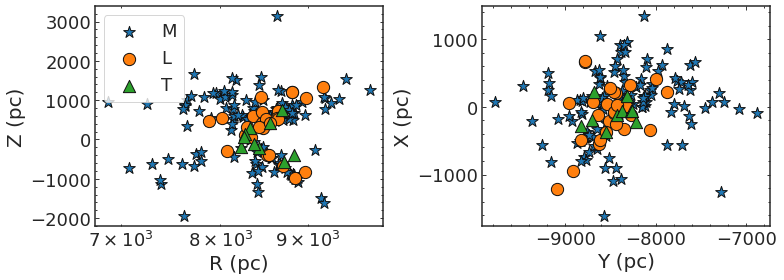

In [11]:
fig, (ax, ax1)=plt.subplots(figsize=(11, 4), ncols=2)

sc=ax.scatter(r[mdwarfs.index], z[mdwarfs.index], s=150, cmap='coolwarm',  marker='*', edgecolors='#111111', label='M')
sc=ax.scatter(r[ldwarfs.index], z[ldwarfs.index], s=150, cmap='coolwarm',  marker='o', edgecolors='#111111', label='L')
sc=ax.scatter(r[tdwarfs.index], z[tdwarfs.index], s=150, cmap='coolwarm',  marker='^', edgecolors='#111111', label='T')

ax.minorticks_on()

sc=ax1.scatter(x[mdwarfs.index], y[mdwarfs.index], s=150, cmap='coolwarm',  marker='*', edgecolors='#111111')
sc=ax1.scatter(x[ldwarfs.index], y[ldwarfs.index], s=150, cmap='coolwarm',  marker='o', edgecolors='#111111')
sc=ax1.scatter(x[tdwarfs.index], y[tdwarfs.index], s=150, cmap='coolwarm',  marker='^', edgecolors='#111111')

ax.minorticks_on()



ax.set_ylabel('Z (pc)', fontsize=20)
ax.set_xlabel('R (pc)', fontsize=20)
ax1.set_ylabel('X (pc)', fontsize=20)
ax1.set_xlabel('Y (pc)', fontsize=20)

ax.minorticks_on()
ax1.minorticks_on()


#add the sun
#Rsun=83000.
#Zsun=27.

#ax1.scatter(0., 0.)
#ax.scatter(8300, 27., marker='')
ax.legend()
#plt.grid(color='#7FDBFF')
#mplcyberpunk.make_lines_glow(ax)
#mplcyberpunk.make_lines_glow(ax1)
ax.set_xscale('log')


plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/candidate_distances.pdf', bbox_inches='tight')

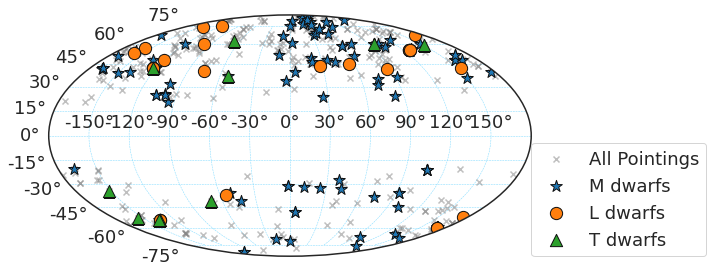

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='mollweide')

ax.scatter(pntcoords.galactic.l.wrap_at(180*u.deg).radian, pntcoords.galactic.b.wrap_at(180*u.deg).radian, \
           c='grey', marker='x', alpha=0.5, label='All Pointings')

c=ax.scatter(galoc.galactic.l.wrap_at(180*u.deg).radian[mdwarfs.index], galoc.galactic.b.wrap_at(180*u.deg).radian[mdwarfs.index], 
             marker='*', edgecolors='#111111', s=150, label='M dwarfs')
c=ax.scatter(galoc.galactic.l.wrap_at(180*u.deg).radian[ldwarfs.index], galoc.galactic.b.wrap_at(180*u.deg).radian[ldwarfs.index], 
             marker='o', edgecolors='#111111', s=150, label='L dwarfs')
c=ax.scatter(galoc.galactic.l.wrap_at(180*u.deg).radian[tdwarfs.index], galoc.galactic.b.wrap_at(180*u.deg).radian[tdwarfs.index], 
             marker='^', edgecolors='#111111', s=150, label='T dwarfs')




             

#plt.xlabel("l", fontsize=18)
#plt.ylabel("b", fontsize=18)
plt.grid(color='#7FDBFF')
plt.legend(loc=(1.0, 0.))
plt.minorticks_on()
#mplcyberpunk.make_lines_glow(ax)

plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/candidate_skymap.pdf', bbox_inches='tight')

In [13]:
#bpnts.max()

In [165]:
bucds=abs(galoc.galactic.b.wrap_at(180*u.deg).to(u.deg).value)
bpnts=abs(pntcoords.galactic.b.wrap_at(180*u.deg).to(u.deg).value)

areanorth= len(bpnts[np.logical_and(bpnts >15, bpnts <= 30.) ])*4.1*(u.arcmin**2)
areamid= len(bpnts[np.logical_and(bpnts >30, bpnts <= 60.) ])*4.1*(u.arcmin**2)
areasouth= len(bpnts[np.logical_and(bpnts >60, bpnts <= 90.) ])*4.1*(u.arcmin**2)

print ('ucds density in 15, 30 {}'.format(len(bucds[np.logical_and(bucds >15, bucds <= 30.) ])/areanorth))
print ('ucds density in 30, 60 {}'.format(len(bucds[np.logical_and(bucds >30, bucds <=60) ])/areamid))
print ('ucds density in 60, 90 {}'.format(len(bucds[np.logical_and(bucds >60, bucds <=90) ])/areasouth))

ucds density in 15, 30 0.0813008130081301 1 / arcmin2
ucds density in 30, 60 0.08009813825948911 1 / arcmin2
ucds density in 60, 90 0.06253908692933084 1 / arcmin2


In [15]:
print ('pointings density in [0,30] {}'.format(len(bpnts[np.logical_and(bpnts >0, bpnts <= 30.) ])))
print ('pointings density in [30, 60] {}'.format(len(bpnts[np.logical_and(bpnts >30, bpnts <=60) ])))
print ('pointings density in [60, 90] {}'.format(len(bpnts[np.logical_and(bpnts >60, bpnts <=90) ])))

pointings density in [0,30] 39
pointings density in [30, 60] 338
pointings density in [60, 90] 156


In [16]:
ldwarfs.distance.min(), ldwarfs.distance.max()

(48.71528673366488, 1967.6618983409805)

In [17]:
mdwarfs.distance.min(), mdwarfs.distance.max()

(67.5115946236165, 3145.493403011518)

In [18]:
tdwarfs.distance.min(), tdwarfs.distance.max()

(87.03068066468285, 841.7989299261608)

In [210]:
mdwarfs.sort_values('distance')[['designation', 'distance', 'distance_er', 'grism_id', \
                                 'spt', 'spt_er']]

,designation,distance,distance_er,grism_id,spt,spt_er
81,J23333951+3925052,67.511595,"[21.146334834524552, 14.760432135779382]",par153-00002,18.0,1.059367
86,J23333572+3922141,257.976774,"[60.514086321779075, 45.482135123429856]",par68-00017,18.0,0.633163
82,J14024558+5410246,294.616249,"[70.54902713611551, 54.848451479814685]",par458-00004,18.0,0.685978
43,J15451481+1155008,294.716048,"[83.11192063619302, 62.84682141716635]",par290-00009,17.0,0.704546
53,J02170328-0513353,302.309873,"[97.64302156288983, 68.17453904826925]",uds-15-g141_15337,17.0,0.500000
...,...,...,...,...,...,...
114,J08540020+4351119,1937.394162,"[662.7424503063594, 458.0872959996807]",par319-00085,18.0,1.197118
30,J22484228-8011132,1998.379675,"[708.8010185583225, 500.19874248354427]",par372-00114,17.0,0.951131
66,J03325279-2751257,2028.966178,"[1890.5677293398758, 614.3099031791455]",goodss-06-g141_11322,17.0,1.706561
50,J23450092-4239288,2107.599864,"[1148.3715044268283, 588.472158899242]",par356-00057,17.0,1.343759


In [168]:
ldwarfs.sort_values('distance')[['designation', 'distance']]

,designation,distance
134,J09275744+6027467,48.715287
136,J11504964-2033396,153.268142
152,J11240834+4202344,326.698141
149,J10193326+2743134,326.981062
143,J12363885+6214516,429.971277
147,J16252493+5721274,437.930645
133,J02171640-0509133,476.196640
144,J12365374+6211177,476.788330
135,J03330420-2751369,511.558236
137,J00150859-7955488,511.820645


In [192]:
def invert_parallax(plx, plx_e):
    ps=np.random.normal(plx, plx_e, int(1e3))
    return np.nanmedian(1000/ps), np.nanstd(1000/ps)

In [178]:
#query vizier
from astroquery.vizier import Vizier
from astropy.coordinates import Angle

close_m=mdwarfs.sort_values('distance').iloc[0].coord
close_l=ldwarfs.sort_values('distance').iloc[0].coord
close_l2nd=ldwarfs.sort_values('distance').iloc[1].coord

In [199]:
close_m, close_l, close_l2nd

(<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
     (353.414642, 39.4181, 67.51159462)>,
 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
     (141.989319, 60.46297, 48.71528673)>,
 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
     (177.706833, -20.561, 153.26814162)>)

In [203]:
res=Vizier.query_region(close_m, radius=Angle(2, "arcsec"), catalog='Gaia')
res

TableList with 4 tables:
	'0:I/345/gaia2' with 32 column(s) and 1 row(s) 
	'1:I/347/gaia2dis' with 9 column(s) and 1 row(s) 
	'2:I/350/gaiaedr3' with 39 column(s) and 1 row(s) 
	'3:I/352/gedr3dis' with 10 column(s) and 1 row(s) 

In [190]:
res[2]#[['Plx', 'e_Plx']]
    

RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RUWE,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RVDR2,e_RVDR2,Tefftemp,loggtemp,PS1,SDSSDR13,SkyMapper2,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000,DEJ2000
deg,mas,deg,mas,,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,e-/s,e-/s,mag,mag,e-/s,e-/s,mag,mag,e-/s,e-/s,mag,mag,mag,km / s,km / s,K,dex(cm / s2),,,,,mag,mag,mag,deg,deg
float64,float64,float64,float64,int64,float64,float32,float64,float64,float32,float64,float32,float64,float32,float32,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,float32,float32,float32,int64,int64,int32,int32,float64,float64,float32,float64,float64
353.41522940865,0.1400,39.41798722745,0.1260,1920130348756557952,19.8170,0.1978,394.330,389.688,0.203,-60.328,0.178,1.058,646.5,1.189,18.660952,0.003403,44.8,7.99,21.210346,0.193658,1148,8.742,17.097862,0.009090,4.112484,--,--,--,--,155303534145112391,--,--,648548121,18.635361,0.003376,661.9,353.41298749613,39.41825532821


In [204]:
invert_parallax(19.8170, 0.1978)

(50.46167232915504, 0.4959279511970719)

In [194]:
res_closel=Vizier.query_region(close_l, radius=Angle(2, "arcsec"), catalog='Gaia')
res_closel

TableList with 6 tables:
	'0:I/324/igsl3' with 18 column(s) and 1 row(s) 
	'1:I/337/gaia' with 14 column(s) and 1 row(s) 
	'2:I/345/gaia2' with 32 column(s) and 1 row(s) 
	'3:I/347/gaia2dis' with 9 column(s) and 1 row(s) 
	'4:I/350/gaiaedr3' with 39 column(s) and 1 row(s) 
	'5:I/352/gedr3dis' with 10 column(s) and 1 row(s) 

In [196]:
res_closel[4]

RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RUWE,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RVDR2,e_RVDR2,Tefftemp,loggtemp,PS1,SDSSDR13,SkyMapper2,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000,DEJ2000
deg,mas,deg,mas,,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,e-/s,e-/s,mag,mag,e-/s,e-/s,mag,mag,e-/s,e-/s,mag,mag,mag,km / s,km / s,K,dex(cm / s2),,,,,mag,mag,mag,deg,deg
float64,float64,float64,float64,int64,float64,float32,float64,float64,float32,float64,float32,float64,float32,float32,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,float32,float32,float32,int64,int64,int32,int32,float64,float64,float32,float64,float64
141.98926293478,0.4664,60.46300729127,0.4113,1038876756960706048,19.4976,0.5670,29.232,-6.780,0.550,28.435,0.544,1.283,131.6,0.5652,20.389630,0.005418,37.06,5.312,21.416180,0.155634,231.8,6.176,18.835306,0.029177,2.580874,--,--,--,--,180551419892006331,1237651538703680481,--,--,20.370577,0.005348,133.9,141.98932405591,60.46288091223


In [197]:
invert_parallax(19.4976, 0.5670)

(51.34318582309327, 1.467104232959618)

In [200]:
res_closel2nd=Vizier.query_region(close_l2nd, radius=Angle(2, "arcsec"), catalog='Gaia')
res_closel2nd

Empty TableList

In [19]:
for o, df in zip(['M', 'L', 'T'], [mdwarfs, ldwarfs, tdwarfs]):
    bools=df.distance_er.apply(lambda x: np.nanmean(x))/df.distance <.5 
    print ('closest {} distance {:0.2f} +/- {:0.2f} designation {} spt {} +/- {:0.1f}'.format(o, \
           df[bools].iloc[df[bools].distance.argmin()].distance,\
           np.nanmedian(df[bools].iloc[df[bools].distance.argmin()].distance_er),
           df[bools].iloc[df[bools].distance.argmin()].designation,
          df[bools].iloc[df[bools].distance.argmin()].spt,\
         df[bools].iloc[df[bools].distance.argmin()].spt_er))
           
print ('--------------------------------------------')

for o, df in zip(['M', 'L', 'T'], [mdwarfs, ldwarfs, tdwarfs]):
    bools=df.distance_er.apply(lambda x: np.nanmean(x))/df.distance <.5 
    print ('farthest {} distance {:0.2f} +/- {:0.2f} designation {} spt {} +/- {:0.1f}'.format(o, \
           df[bools].iloc[df[bools].distance.argmax()].distance,\
           np.nanmedian(df[bools].iloc[df[bools].distance.argmax()].distance_er),
           df[bools].iloc[df[bools].distance.argmax()].designation,
          df[bools].iloc[df[bools].distance.argmax()].spt,\
         df[bools].iloc[df[bools].distance.argmax()].spt_er))


closest M distance 67.51 +/- 17.95 designation J23333951+3925052 spt 18.0 +/- 1.1
closest L distance 48.72 +/- 11.28 designation J09275744+6027467 spt 21.0 +/- 0.7
closest T distance 165.21 +/- 58.66 designation J03325821-2741436 spt 36.0 +/- 0.5
--------------------------------------------
farthest M distance 2107.60 +/- 868.42 designation J23450092-4239288 spt 17.0 +/- 1.3
farthest L distance 1106.92 +/- 527.34 designation J11545284+1939360 spt 24.0 +/- 2.9
farthest T distance 841.80 +/- 223.23 designation J11151423+5257050 spt 32.0 +/- 2.2


In [20]:
len(z.value), len(z.value[z.value>0]), len(z.value[z.value<0]),  len(z.value[abs(z.value)>1000]), \
len(z.value[abs(z.value)<=1000]), 

(164, 104, 60, 38, 126)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


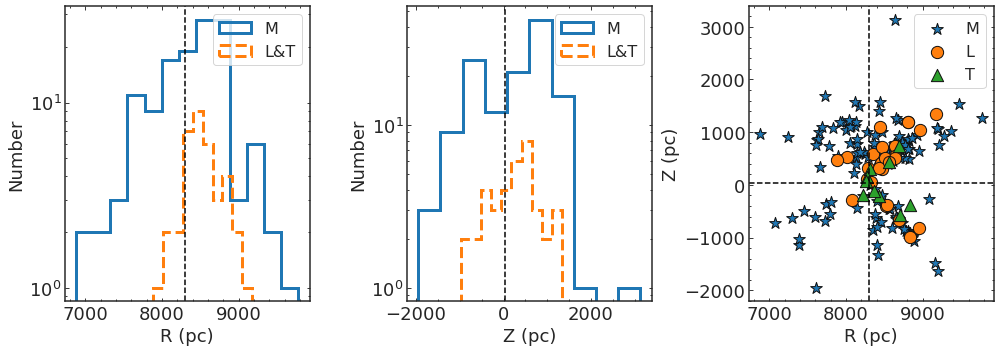

In [21]:
fig, (ax, ax1, ax2)=plt.subplots(ncols=3, figsize=(14, 5 ))

h=ax.hist(r.value[mdwarfs.index], bins='auto', histtype='step', linewidth=3, log=True,  label='M')
h=ax1.hist(z.value[mdwarfs.index], bins='auto', histtype='step', linewidth=3, log=True, label='M')

h=ax.hist(r.value[np.concatenate([list(ldwarfs.index), list(tdwarfs.index)])],\
                                 histtype='step', linewidth=3, linestyle='--', log=True, label=r'L&T')
h=ax1.hist(z.value[np.concatenate([list(ldwarfs.index), list(tdwarfs.index)])],\
           histtype='step', linewidth=3, linestyle='--', log=True, label=r'L&T')

sc=ax2.scatter(r[mdwarfs.index], z[mdwarfs.index], s=150, cmap='coolwarm',  marker='*', edgecolors='#111111', label='M')
sc=ax2.scatter(r[ldwarfs.index], z[ldwarfs.index], s=150, cmap='coolwarm',  marker='o', edgecolors='#111111', label='L')
sc=ax2.scatter(r[tdwarfs.index], z[tdwarfs.index], s=150, cmap='coolwarm',  marker='^', edgecolors='#111111', label='T')



ax.axvline(8300, c='k', linestyle='--')
ax1.axvline(27, c='k', linestyle='--')

ax2.axvline(8300, c='k', linestyle='--')
ax2.axhline(27, c='k', linestyle='--')

ax2.set_ylabel('Z (pc)', fontsize=18)
ax2.set_xlabel('R (pc)', fontsize=18)

ax.set(ylabel='Number')
ax1.set(ylabel='Number')

ax.set_xlabel('R (pc)')
ax1.set_xlabel('Z (pc)')
for a in [ax, ax1, ax2]:
    a.minorticks_on()
    a.legend(fontsize=16)
plt.tight_layout()
#ax1.legend()
plt.savefig(wisps.OUTPUT_FIGURES+'/rz_distribution.pdf',  bbox_inches='tight',  facecolor='white', transparent=False)

In [22]:
#fghjh

In [23]:
#favorite T dwarf
fav_t=tdwarfs.iloc[-3].spectra
import glob
from astropy.io import fits
from matplotlib import gridspec
from astropy.visualization import ZScaleInterval
from matplotlib.colors import LogNorm

In [24]:
#fav_sppath=glob.glob('/volumes/burgasserlab/Surveys//goods*/goodss-01/goodss-01*G141*_sci.fits')[0]
#fav_impath=glob.glob('/volumes/burgasserlab/Surveys//goods*/goodss-01/goodss-01*F1*drz_sci.fits')[0]

In [25]:
#fav_sppath

In [26]:
def plot_image(image, ax, cmap='binary', alpha=0.1):
    mask=image<5.*np.nanstd(image)
    vmin, vmax=ZScaleInterval().get_limits( image[mask])
    #norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax, clip=False)
    #print (vmin)
    #norm=LogNorm(vmin=, vmax=vmax)
    grid=np.mgrid[0:image.shape[0]:1, 0:image.shape[1]:1]
    ax.pcolormesh(grid[0], grid[1], 
       image, cmap=cmap,
       rasterized=True,   norm=matplotlib.colors.SymLogNorm(linthresh=0.03, linscale=0.03,
                                              vmin=-1.0, vmax=1.0),
                  alpha=alpha)

    #ax.plot(image_data['center'][0], 
    #image_data['center'][1], marker='+',c='#111111', ms=30)


In [27]:
#fav_t.photo_image.

img0=fits.open(fav_impath)[0].data
fig, ax=plt.subplots(figsize=(8, 8))
plot_image(img0, ax, cmap='cubehelix')
plot_image(img0, ax, cmap='inferno', alpha=0.2)
plot_image(img0, ax, cmap='gist_gray', alpha=0.05)

ax.set_xticks([])
ax.set_yticks([])
#ax.set_title('F140W ', fontsize=18)
plt.savefig(wisps.OUTPUT_FIGURES+'/example_image.pdf', bbox_inches='tight',  facecolor='black', transparent=False)

In [28]:
#fits.open(fav_sppath)#[0].data

img1=fits.open(fav_sppath)[0].data
fig, ax=plt.subplots(figsize=(8, 8))


plot_image(img1, ax, cmap='cubehelix')
plot_image(img1, ax, cmap='inferno', alpha=0.2)
plot_image(img1, ax, cmap='gist_gray', alpha=0.05)

ax.set_xticks([])
ax.set_yticks([])
#ax.set_title('F140W ', fontsize=18)
plt.savefig(wisps.OUTPUT_FIGURES+'/example_spectra.pdf', bbox_inches='tight',  facecolor='black', transparent=False)

fig, ax=plt.subplots(figsize=(17,8), ncols=2)
plot_image(img0, ax[0], cmap='cubehelix')
plot_image(img0, ax[0], cmap='inferno', alpha=0.2)
plot_image(img0, ax[0], cmap='gist_gray', alpha=0.05)

plot_image(img1, ax[1], cmap='cubehelix')
plot_image(img1, ax[1], cmap='inferno', alpha=0.2)
plot_image(img1, ax[1], cmap='gist_gray', alpha=0.05)

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
#ax.set_title('F140W ', fontsize=18)
plt.savefig(wisps.OUTPUT_FIGURES+'/example_spectra_and_image.pdf', bbox_inches='tight',  \
            facecolor='white', transparent=False)

In [29]:
df=wisps.get_big_file()

In [30]:
fav_t.pixels_per_image

100

In [31]:
#so= wisps.Source(filename='goodss-01-G141_48019')
#s1= wisps.Source(filename=df.grism_id.sample().values[0])
#s3=wisps.Source(filename='goodss-01-G141_47749')
#s4=wisps.Source(filename='goodss-01-G141_45524')

In [32]:
#s1

In [33]:
#p=wisps.plot_spectrum.plot_source(s4, compare_to_std=False, show_bands=False, save=True, 
#                                  filename=wisps.OUTPUT_FIGURES+'/example_emission.pdf')
#p=wisps.plot_spectrum.plot_source(s3, compare_to_std=False, show_bands=False, save=True,
#                                  filename=wisps.OUTPUT_FIGURES+'/example_emission2.pdf')
#p=wisps.plot_spectrum.plot_source(s1, compare_to_std=False, show_bands=False, save=True,
#                                  filename=wisps.OUTPUT_FIGURES+'/example_emission3.pdf')

In [34]:
#goodss-01-G141_45524.1D.png
#goodss-01-G141_47749.1D.png
#goodss-01-G141_47995.1D.png
#goodss-01-G141_48019.1D.png

In [35]:
#fav_t.filepath

In [36]:
#fav

In [37]:
#fghjnk

In [38]:
fdf=ucds.sort_values(by='spt')[['grism_id', 'distance', 'spt','spectra']]

In [39]:
def formatted_distance(x):
    d= str(int(round(x.distance['val'].value, 0)))
    der=[str(int(abs(round(x.distance['er'].value[0], 0)))),\
            str(int(abs(round(x.distance['er'].value[0], 0))))]
         
    if abs(x.distance['er'].value[0])/x.distance['val'].value >0.9:
        return "$\\approx$"+d
    else:
        #return r'$'+d+'\substack{+'+der[0]+'\\\ -'+der[-1]+'}$'
        return d+'$^{+'+der[0]+'}'+'_{-'+der[1]+'}$'

In [40]:
#formatted_distance(fdf.spectra.iloc[0])

In [41]:
latc_df=pd.DataFrame()

In [42]:
#latc_df.iloc[0]['f110']

In [43]:
latc_df=latc_df.replace('nan$\\pm$nan', '\nodata')

In [44]:
#get the right sequence of coplumns
col_list=['designation','grism id', 'f110', 'f140', 'f160', 'snrj', 'spt', 'distance']

In [45]:
#latc_df[latc_df.d]

In [46]:
#don't save, saved in another notebook
#latc_df[col_list].to_latex(wisps.LIBRARIES+'/candidates.tex',
#             header=True, index=False, escape=False, na_rep=' ')

In [47]:
(360**2*u.deg**2).to(u.arcmin**2)

<Quantity 4.6656e+08 arcmin2>

In [48]:
#fghjkl;

#########################

In [130]:
spdwarf=splat.searchLibrary(giant=False, ucd=True, binary=False, spex_type=[17, 40])
spdwarf.shortname=spdwarf.DESIGNATION.apply(splat.designationToShortName)
spdwarf=spdwarf[~ ( spdwarf.shortname.isin(wisps.FORBIDDEN_LIST)
               | (spdwarf.H_2MASS_E > 0.4) | (spdwarf.J_2MASS_E > 0.4) \
                   | (spdwarf.MEDIAN_SNR <10) ) ]
#spdwarf=spdwarf[~spdwarf.]
spdwarf.SPEX_TYPE=spdwarf.SPEX_TYPE.apply(wisps.make_spt_number)
spdwarf=spdwarf[spdwarf.SPEX_TYPE.between(17, 40)]


In [131]:
#dwarf.columns

In [132]:
def format_jk_zhang(row):
    jmag=np.nan
    hmag=np.nan
    jmag_er=np.nan
    hmag_er=np.nan
    if row['J'] !='none':
        #print ((row['J']).split('±'))
        #row['J_mag']=(row['J']).split('±')[0]
        #row['J_er']=(row['J']).split('±')[-1]
        jmag=(row['J']).split('±')[0]
        jmag_er=(row['J']).split('±')[1]
        
    if row['H'] !='none':
        #print ((row['H']).split('±'))
        #row['H_mag']=(row['H']).split('±')[0]
        #row['H_er']=(row['H']).split('±')[-1]
        hmag=(row['H']).split('±')[0]
        hmag_er=(row['H']).split('±')[1]
        
    spt=splat.typeToNum(row[' SpT'])
        
    return pd.Series({'H':jmag, 'J':hmag, 'H_er':hmag_er, 'J_er':jmag_er, 'SpTn':spt})

def format_jk_manj(row):
    jmag=np.nan
    hmag=np.nan
    jmag_er=np.nan
    hmag_er=np.nan
    if str(row['J (mag)']) !='nan':
        #ignore others
        if not str(row['J (mag)']).startswith('>'):
            jmag=((row['J (mag)']).split('+or-')[0]).strip()
            jmag_er=((row['J (mag)']).split('+or-')[1]).strip()

    if str(row['H (mag)']) !='nan':
        if not str(row['H (mag)']).startswith('>'):
            hmag=(row['H (mag)']).split('+or-')[0]
            hmag_er=(row['H (mag)']).split('+or-')[1]
        
    spt=splat.typeToNum(row['SpT'])
        
    return pd.Series({'H':hmag, 'J':jmag, 'H_er':hmag_er, 'J_er':jmag_er, 'SpTn':spt})

In [133]:
fdf=ucds
pols=wisps.POLYNOMIAL_RELATIONS
color_pol=pols['colors']

In [134]:
#zhang
zhng=pd.read_csv('~/research/wisps/data/zhang_data.csv')
zhng_clrs=zhng.apply(format_jk_zhang, axis=1 ).applymap(float)

In [135]:
#manjavacas
man_df0=pd.read_csv('/users/caganze/research/wisps/data/manjavaca_phot.txt', sep='\t',  index_col=None)
man_clrs=man_df0.apply(format_jk_manj, axis=1 ).applymap(float)

In [136]:
#!open /users/caganze/research/wisps/data/manjavaca_phot.txt

In [137]:
fdf['J']=fdf['F140W']+color_pol['j_f140'][0](fdf['spt'])
fdf['J_er']=(fdf['F140W_er']**2+color_pol['j_f140'][1]**2)**0.5

fdf['H']=fdf['F160W']+color_pol['h_f160'][0](fdf['spt'])
fdf['H_er']=(fdf['F160W_er']**2+color_pol['h_f160'][1]**2)**0.5

In [138]:
fdf['J_110']=fdf['F110W']+color_pol['j_f110'][0](fdf['spt'])
fdf['J_110_er']=(fdf['F110W_er']**2+color_pol['j_f110'][1]**2)**0.5

In [139]:
ucd_wisp=fdf[fdf.grism_id.str.startswith('par')]
ucd_hst3d=fdf[~fdf.grism_id.str.startswith('par')]

In [140]:
#remove planets
man_clrs=man_clrs[abs(man_clrs['H']-man_clrs['J']<2)]
spdwarf=spdwarf[(spdwarf['J_2MASS']-spdwarf['H_2MASS']<2) &(spdwarf.SPEX_TYPE >=17.)]

In [141]:
corrj=splat.photometry.vegaToAB('2MASS J')
corrh=splat.photometry.vegaToAB('2MASS H')

In [142]:
#corrj

In [143]:
#splat.photometry.vegaToAB?
#!open ~/research/splat/splat/photometry.py

In [144]:
#mask planets and jupiters from manjavacas
planets=np.logical_or(np.logical_and(((man_clrs['J']+corrj)-(man_clrs['H']+corrh)) > 1.5, \
                       man_clrs['SpTn'] >35), man_clrs['SpTn'] >39)
                       

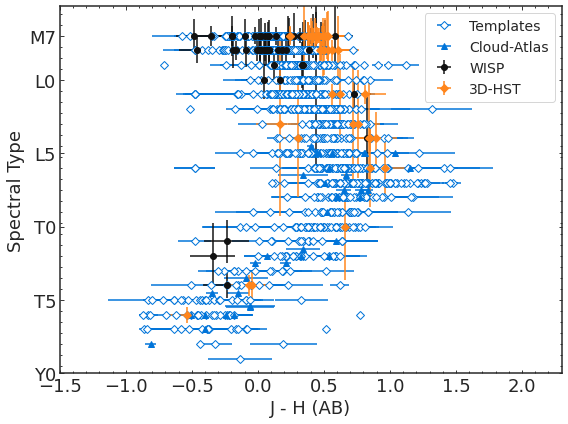

In [164]:
fig, ax=plt.subplots(figsize=(8, 6))



#ax.scatter(((spdwarf['J_2MASS'])+corrj)-((spdwarf['H_2MASS'])+corrh), spdwarf.SPEX_TYPE, marker='D', 
#            edgecolor='#0074D9', 
#            facecolor='none',  label='Templates', alpha=1.)

ax.errorbar(((spdwarf['J_2MASS'])+corrj)-((spdwarf['H_2MASS'])+corrh), spdwarf.SPEX_TYPE, \
            fmt='D', 
            color='#0074D9', xerr=(spdwarf.J_2MASS_E**2+spdwarf.H_2MASS_E**2)**0.5,\
            mfc='white',  label='Templates', alpha=1.)

#ax.errorbar(spsubdwarf['J_2MASS']-spsubdwarf['H_2MASS'],spsubdwarf.SPEX_TYPE, fmt='D', 
            
#            color='#2ECC40', mfc='white', label='Spex Subdwarfs')

ax.errorbar(((man_clrs['J']+corrj)-(man_clrs['H']+corrh))[~planets], \
            (man_clrs['SpTn'])[~planets], fmt='^', 
            xerr=((man_clrs['J_er']**2+man_clrs['H_er']**2)**0.5)[~planets], color='#0074D9',\
            label='Cloud-Atlas')

#ax.errorbar(-zhng_clrs['J']+zhng_clrs['H'],zhng_clrs.SpTn, fmt='*', 
#            xerr=(zhng_clrs.J_er**2+zhng_clrs.H_er**2)**0.5, color='#FF4136', label='Primeval')



ax.errorbar(ucd_wisp['J_110']-ucd_wisp['H'], ucd_wisp['spt'], fmt='o', 
            xerr=(ucd_wisp['J_110_er']**2+ucd_wisp['H_er']**2)**0.5, 
            yerr=ucd_wisp['spt_er'], color='#111111', label=r'WISP')

ax.errorbar(ucd_hst3d['J']-ucd_hst3d['H'], ucd_hst3d['spt'], fmt='D',
            xerr=(ucd_hst3d['J_er']**2+ucd_hst3d['H_er']**2)**0.5, 
            yerr=ucd_hst3d['spt_er'], color='#FF851B', label=r'3D-HST')


ax.set_ylim([15, 40])
ax.set_xlim([-1.5, 2.3])
ax.invert_yaxis()


ax.set_yticks([17, 20, 25, 30, 35, 40])
ax.set_yticklabels(['M7', 'L0', 'L5', 'T0', 'T5', 'Y0'])


ax.minorticks_on()
ax.set_ylabel('Spectral Type', fontsize=18)
ax.set_xlabel(r'J - H (AB)', fontsize=18)

ax.legend(fontsize=14)
#mplcyberpunk.make_lines_glow(ax)
#plt.grid(which='both', color='#7FDBFF')
plt.tight_layout()

plt.savefig(wisps.OUTPUT_FIGURES+'/color_color_plots.pdf', bbox_inches='tight')


In [146]:
wispsucd=ucds[ucds.grism_id.str.lower().str.startswith('par')]
hst3ducd=ucds[~ucds.grism_id.str.lower().str.startswith('par')]

In [147]:
#older_pnts=pd.read_pickle(wisps.OUTPUT_FILES+'/pointings_corrected.pkl')
pnts=pd.read_pickle(wisps.OUTPUT_FILES+'/pointings_correctedf110.pkl')
maglimits=pd.DataFrame([x.mag_limits for x in pnts])

In [148]:
MAX_LTS=maglimits.max()[['F110', 'F140', 'F160']].values
MED_LTS=maglimits.median()[['F110', 'F140', 'F160']].values

In [149]:
corr_pols=wisps.POLYNOMIAL_RELATIONS['mag_limit_corrections']

In [150]:
sp_grid=np.arange(15, 40)

d_limitsdict=(pd.DataFrame([wisps.distance({'F110W': (MED_LTS[0], 0.5), 'F140W': (MED_LTS[1], 0.5), 
                                            'F160W': (MED_LTS[2], 0.5)}, x, 0.) 
                        for x in sp_grid])[['distF110W', 'distF140W', 'distF160W']]).apply(lambda x: np.nanmean(x), axis=1)


corrected_limits=(pd.DataFrame([wisps.distance({'F110W': (MAX_LTS[0], 0.5), 'F140W': (MAX_LTS[1], 0.5), 
                                            'F160W': (MAX_LTS[2], 0.5)}, x, 0.)
                        for x in sp_grid])[['distF110W', 'distF140W', 'distF160W']]).apply(lambda x: np.nanmean(x), axis=1)


new_corrected_limits=(pd.DataFrame([wisps.distance({'F110W': (MAX_LTS[0]+(corr_pols['F110W'][0])(x), 0.5), 
                                                    'F140W': (MAX_LTS[0]+(corr_pols['F140W'][0])(x), 0.5), 
                                                    'F160W': (MAX_LTS[0]+(corr_pols['F160W'][0])(x), 0.5)},
                                                   x, 0.) 
                        for x in sp_grid])[['distF110W', 'distF140W', 'distF160W']]).apply(lambda x: np.nanmean(x), axis=1)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
#ax.axhline?

In [ ]:
#plt.plot(xs[:,0], xs[:,1], '.')

In [ ]:
fig, (ax, ax1)=plt.subplots(ncols=2, figsize=(10, 4))
#sns.distplot(ucds.spt, kde=False, ax=ax, rug=True, hist_kws={'align': 'mid'})
ax.hist(ucds.spt.values, bins=23, log=True, align='mid')
#ax.axhline(np.nanmedian(ucds.spt_er.values))
ax.set_xlabel('Spectral Type', fontsize=18)
ax.set_ylabel('Number', fontsize=18)
ax.minorticks_on()
#ax.set_yscale('log')


#sns.distplot(ucds.distance, kde=False, ax=ax1, rug=True, hist_kws={'align': 'mid'})
ax1.hist(np.log10(ucds.distance.values), bins=23, log=True, align='mid')
plt.tight_layout()
ax1.set_xlabel('Log Distance (pc)', fontsize=18)
ax1.set_ylabel('Number', fontsize=18)
ax1.minorticks_on()
#ax1.set_xscale('log')

#for a in [ax, ax1]:
ax.set_xticks([17, 20, 25, 30, 35, 40])
ax.set_xticklabels(['M7', 'L0', 'L5', 'T0', 'T5', 'Y0'])

plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/sptdistribution.pdf',  bbox_inches='tight')

In [ ]:
len(ucds)

In [ ]:
plt.hist(ucds.spt, log=True, bins=23)

In [ ]:
fig, ax=plt.subplots(figsize=(7, 14))

for  idx, y in enumerate(tdwarfs.spectra):
    x=y.splat_spectrum
    
    if x.wave.value.min()< 0.9:
        x.trim([0.88, 1.7])
        
    if x.wave.value.min()>0.9:
        x.trim([1.1, 1.7])
  
    std= splat.STDS_DWARF_SPEX[splat.typeToNum(y.spectral_type[0])]
    
    std.normalize(waverange=[1.15, 1.65])
    x.normalize(waverange=[1.15, 1.65])
    

    
    med0=(x.flux.value[np.logical_and(x.wave.value >1.15, x.wave.value <1.65) ]).mean()
    med1=(std.flux.value[np.logical_and(std.wave.value >1.15, std.wave.value <1.65) ]).mean()
    
    std.scale(med0/med1)
    
    plt.text(1.4, (x.flux.value+idx/1.5).mean(),splat.typeToNum(y.spectral_type[0]),
             {'fontsize':17, 'weight': 'bold'}, color='#0074D9')
    
    
    plt.step(x.wave.value, x.flux.value+idx/1.5, c='#0074D9')
    plt.plot(std.wave.value, std.flux.value+ idx/1.5, c='#01FF70')
    plt.ylim([0., 8.05])
    plt.xlim([0.85, 1.7])
    
plt.minorticks_on()
 
#mplcyberpunk.make_lines_glow(ax)
    
ax.set_xlabel(r'$\lambda$ ( micron)', fontsize=24)
ax.set_ylabel(r'Normalized Flux + offset', fontsize=24)

plt.tight_layout()  
#mplcyberpunk.add_underglow()
#mplcyberpunk.make_lines_glow(ax)
plt.savefig(wisps.OUTPUT_FIGURES+'/tdwarfsequence.pdf')

In [ ]:
#nnselection

In [ ]:


plt.errorbar(ucds.F140W, ucds.spt, xerr=ucds.F140W_er, yerr=ucds.spt_er, 
             fmt='o', c='k', label='WISP')


len(ucds)

In [ ]:
ucds[ucds.spt_er>4][['spt', 'spt_er', 'grism_id', 'designation']]

In [ ]:
len(ucds)

In [ ]:
ispsisps

In [ ]:
hgjj

In [ ]:
ucds['f_test']=ucds.spectra.apply(lambda x: x.f_test)
ucds['dof']=ucds.spectra.apply(lambda x: x.dof)
ucds['line_chi']=ucds.spectra.apply(lambda x: x.line_chi)
ucds['spex_chi']=ucds.spectra.apply(lambda x: x.spex_chi)
ucds['wavenumber']=ucds.spectra.apply(lambda x:len(x.wave))

In [ ]:
len(ucds)

In [ ]:
import wisps.simulations as wispsim


In [ ]:
px=wisps.POLYNOMIAL_RELATIONS['abs_mags']['F110W'][0]

In [ ]:
wisps.POLYNOMIAL_RELATIONS['colors']['h_f160']

In [ ]:
#px=np.poly1d(np.flip([6.4E-07, -9.1E-05, 5.2E-03, -1.6E-01, \
#                      .6E+00, -2.1E+01, 7.1E+01]))

In [ ]:
plt.plot(np.arange(15, 40, 1), px(np.arange(15, 40, 1)))

In [ ]:
ucds['med_dist_er']=np.nanmedian(np.vstack(ucds.distance_er.values), axis=1)

In [ ]:
ms=ucds[ucds.spt.between(16,19)]
ls=ucds[ucds.spt.between(20,29)]
ts=ucds[ucds.spt.between(30,45)]


In [ ]:
ts[ts.med_dist_er/ts.distance <0.6].sort_values('distance')[['designation', 'distance', \
                                                             'distance_er', 'spt', 'spt_er']]

ms.spt_er 

In [ ]:
870-(123-20-7-7-4)

In [ ]:
splat.ABSMAG_LBOL_RELATIONS